Hitesh                                                  \
Enrollment Number: A023119820027                        \
Programme: B.Tech AI                                    \
Branch: Artificial Intelligence                         \
Batch: 2020 - 2024                                      \
Semester: 7                                             \
Section: 7AI 1                                          \
Email id: hiteshb3004@gmail.com                         \
Phone Number: 9873315702

#TSA LAB 6: Auto ARIMA Model - Air Passengers Dataset

----

## About the Dataset

The dataset contains number of air passengers of each month from the year 1949 to 1960.

In [ ]:
import pandas, numpy, matplotlib,seaborn as sns


sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

First let´s load the dataset and get a general overview.

In [ ]:
original = pandas.read_csv("/content/AirPassengers (1).csv", index_col=['Month'], parse_dates=['Month'])

# read data csv file using pandas and make Month column as index
#original = original.set_index('Month')
# preview data using head command
original.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
original.rename(columns = {'#Passengers' : 'Passengers'}, inplace = True)

In [ ]:
# preview data using head command
original.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# check data shape
original.shape

(144, 1)

In [ ]:
# use describe command to describe your data
original.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


The dataset isn´t too complex. We have 2 columns, one for the `month` and the other column is our target.

In total we have 144 rows. Not very much, but let´s see if we can do something with it.

As desribed above missing values are crucial for our prediction. Let´s see if we have any missing values.

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

In [ ]:
data = original

In [ ]:
data.dropna(inplace=True)

In [ ]:
train_size = int(len(data) * 0.80)

In [ ]:
y_train, y_test = data[0:train_size], data[train_size:]

In [ ]:
!pip install pmdarima

from pmdarima.arima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1604.291, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1079.817, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1074.529, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1075.775, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1075.654, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1076.970, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1073.718, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1078.074, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1083.134, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1074.610, Time=0

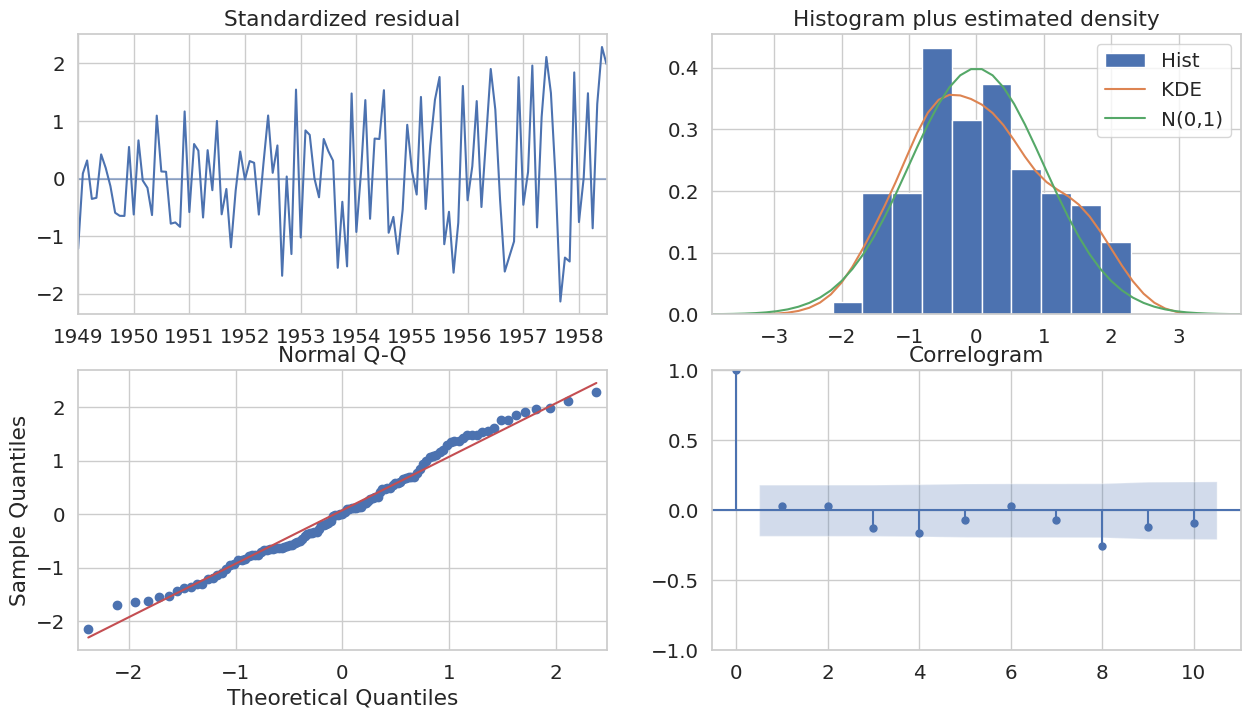

In [ ]:
model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=20, max_q=20, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)


print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


In [ ]:
data.index.freq = 'MS'

In [ ]:
#Modeling
# Build Model
model = ARIMA(y_train, order=(3,0,2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -531.307
Date:                Thu, 14 Sep 2023   AIC                           1076.614
Time:                        05:04:16   BIC                           1095.828
Sample:                    01-01-1949   HQIC                          1084.413
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.0202     73.518      3.265      0.001      95.928     384.113
ar.L1          0.3270      0.975      0.335      0.737      -1.584       2.238
ar.L2          0.6475      0.417      1.554      0.1

In [ ]:
data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
index = data[train_size:].index
y_train = data[0:train_size]
y_test = data[train_size:]

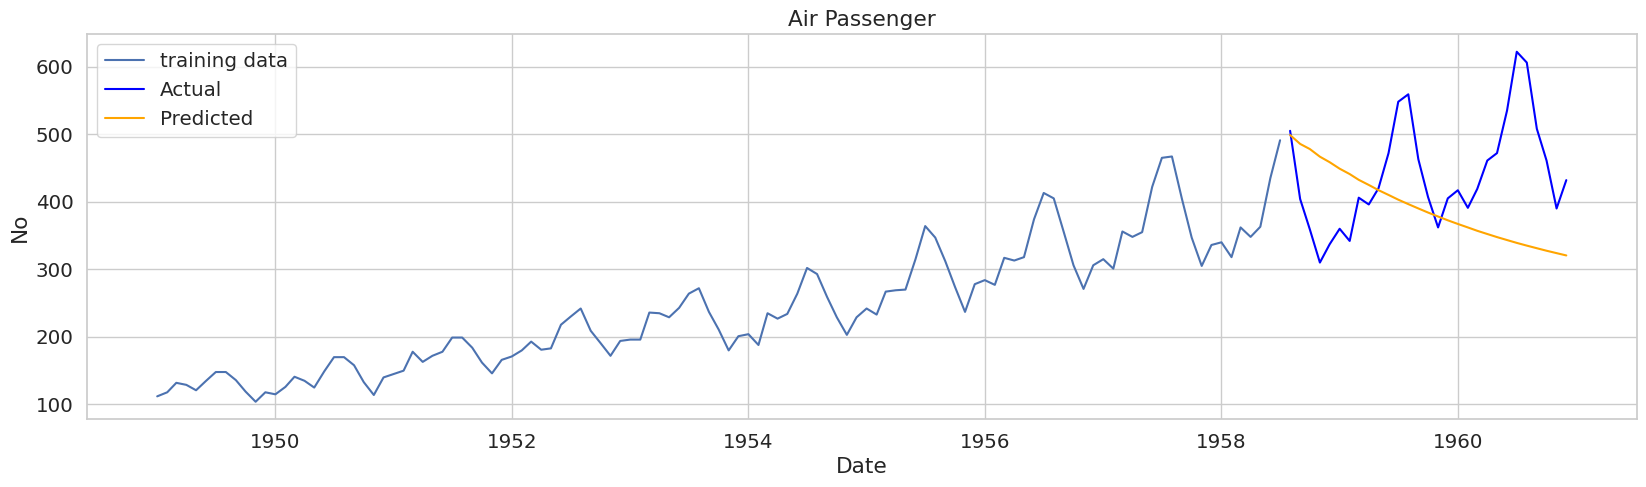

In [ ]:
# Forecast
fc = fitted.forecast(steps=len(y_test))  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=index)
# Plot
plt.figure(figsize=(20,5), dpi=100)

plt.plot(y_train, label='training data')

plt.plot(y_test, color = 'blue', label='Actual')

plt.plot(fc_series, color = 'orange',label='Predicted')

plt.title('Air Passenger')
plt.xlabel('Date')
plt.ylabel('No')
plt.legend()
plt.show()


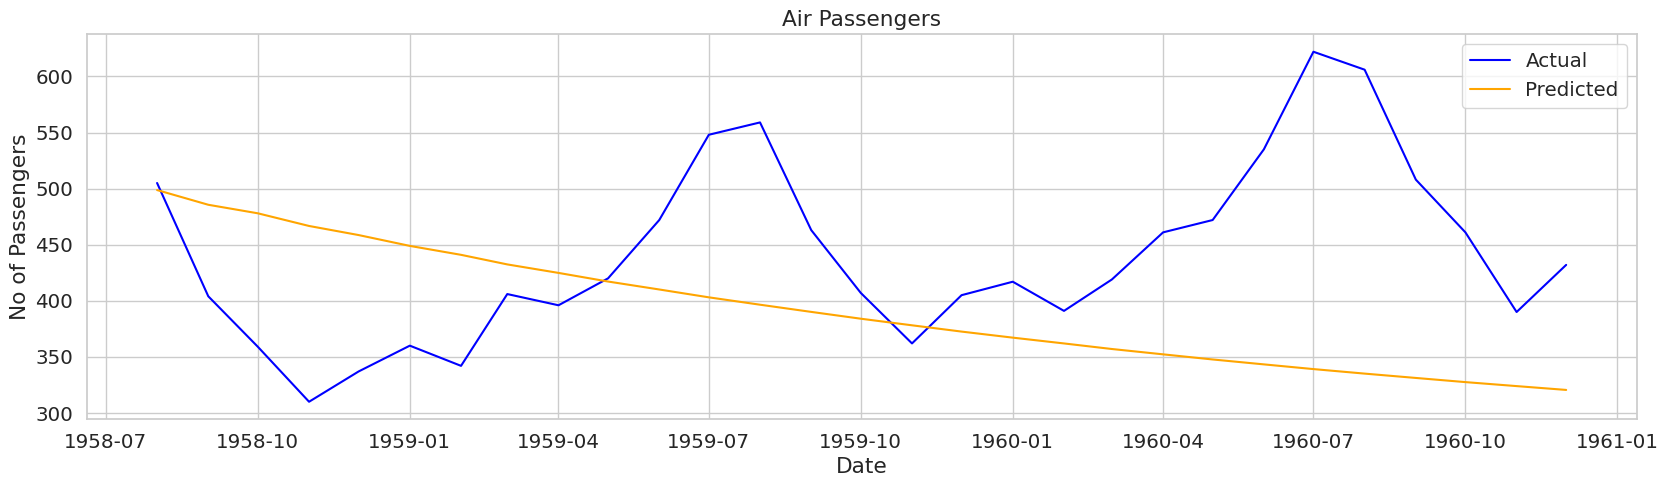

In [ ]:
# Plot
plt.figure(figsize=(20,5), dpi=100)

plt.plot(y_test, color = 'blue', label='Actual')

plt.plot(fc_series, color = 'orange',label='Predicted')

plt.title('Air Passengers')
plt.xlabel('Date')
plt.ylabel('No of Passengers')
plt.legend()
plt.show()